# An example of DCNN — LeNet

Adaptado de
https://learning.oreilly.com/library/view/deep-learning-with/9781787128422/592bcfab-9b3d-43df-8348-593769e8fde0.xhtml

En el enlace se encuentran los comentarios.

### Mnist
https://en.wikipedia.org/wiki/MNIST_database

In [1]:
# import the necessary packages
# Cambio a tensorflow 2.x
# En lugar de from keras import, from tensorflow.keras import
# ciertos subpaquetes del antiguo keras desaparacen o cambian de nombre
# ver lista siguiente

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")

# from keras import backend as K
from tensorflow.keras import backend as K
# from keras.models import Sequential
from tensorflow.keras.models import Sequential
# from keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv2D
# from .keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.layers import MaxPooling2D
# from w.keras.layers.core import Activation
from tensorflow.keras.layers import Activation
# from keras.layers.core import Flatten
from tensorflow.keras.layers import Flatten
# from keras.layers.core import Dense
from tensorflow.keras.layers import Dense
# from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
# from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

import numpy as np
import matplotlib.pyplot as plt

No GPU was detected. LSTMs and CNNs can be very slow without a GPU.


In [2]:
np.random.seed(1671)  # for reproducibility
tf.random.set_seed(1671)

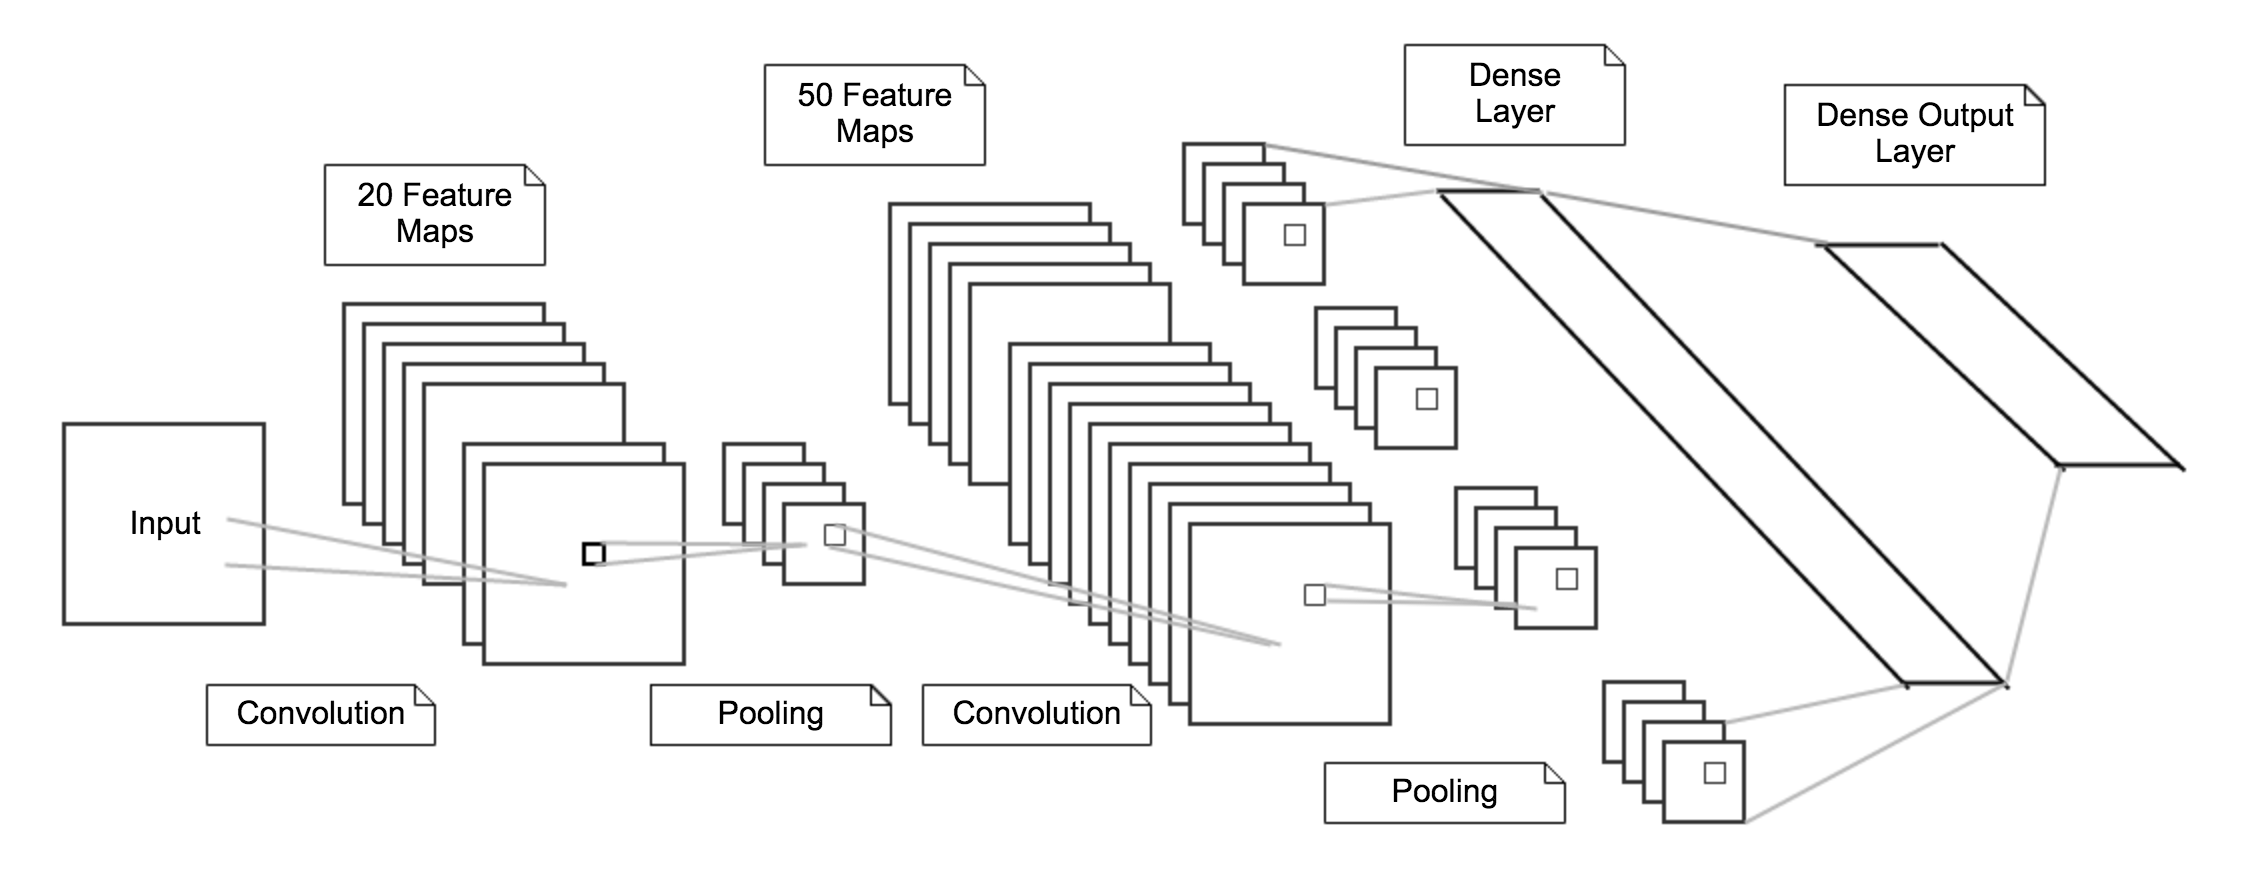

In [3]:
from IPython.display import Image
Image("images/keras_LeNet.png")

In [4]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        # CONV => RELU => POOL
        model.add(Conv2D(20, kernel_size=5, padding="same",
            input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, padding="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
 
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        return model

In [5]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10  # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [6]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Para Keras >= 2.2.5 o tensorflow.keras
# set_image_data_format en lugar de set_image_dim_ordering
# th(theano) channel_first, tf(tensorflow) channel_last
# K.set_image_dim_ordering("th")
K.set_image_data_format("channels_first")

# reducimos el número de datos por velocidad
# si se tiene GPU o tiempo suficiente usar los totales
# para obtener mejores resultados
n_train = 6000 # total 60000
n_test = 1000 # total 10000
grey_levels = 255

# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= grey_levels 
X_test /= grey_levels

# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:n_train, np.newaxis, :, :]
X_test = X_test[:n_test, np.newaxis, :, :]

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
# cambio de imports en tensorflow.keras.utils
# y_train = np_utils.to_categorical(y_train[:n_train], NB_CLASSES)
# y_test = np_utils.to_categorical(y_test[:n_test], NB_CLASSES)
y_train = to_categorical(y_train[:n_train], NB_CLASSES)
y_test = to_categorical(y_test[:n_test], NB_CLASSES)

6000 train samples
1000 test samples


In [7]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.summary()
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
    metrics=["accuracy"])

history = model.fit(X_train, y_train, 
        batch_size=BATCH_SIZE, epochs=NB_EPOCH, 
        verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 28, 28)        520       
                                                                 
 activation (Activation)     (None, 20, 28, 28)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 20, 14, 14)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 14, 14)        25050     
                                                                 
 activation_1 (Activation)   (None, 50, 14, 14)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 50, 7, 7)          0         
 g2D)                                                   

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node 'sequential/max_pooling2d/MaxPool' defined at (most recent call last):
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
      self._run_once()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
      handle._run()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/asyncio/events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 383, in do_execute
      res = shell.run_cell(
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2881, in run_cell
      result = self._run_cell(
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 2936, in _run_cell
      return runner(coro)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3135, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3338, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_16897/432213464.py", line 7, in <cell line: 7>
      history = model.fit(X_train, y_train,
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/sequential.py", line 404, in call
      return super().call(inputs, training=training, mask=mask)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/Users/maciasalvasalva/miniconda3/envs/MachineLearning/lib/python3.10/site-packages/keras/src/layers/pooling/base_pooling2d.py", line 84, in call
      outputs = self.pool_function(
Node: 'sequential/max_pooling2d/MaxPool'
Default MaxPoolingOp only supports NHWC on device type CPU
	 [[{{node sequential/max_pooling2d/MaxPool}}]] [Op:__inference_train_function_871]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


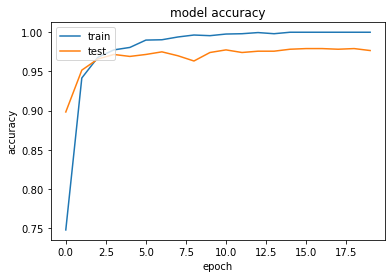

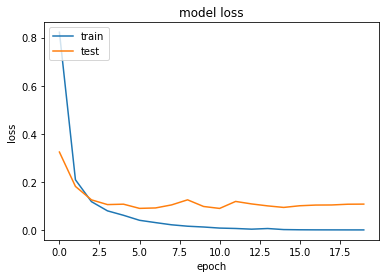

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Liberar recursos GPU
# descomentar si se usa GPU

# from numba import cuda
# cuda.select_device(0)
# cuda.close()